## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv', sep='\s*,\s*',
                           header=0, encoding='ascii', engine='python')
print(df.head(n=3))


   user_id timestamp      group landing_page  converted
0   851104   11:48.6    control     old_page          0
1   804228   01:45.2    control     old_page          0
2   661590   55:06.2  treatment     new_page          0


b. Use the below cell to find the number of rows in the dataset.

In [4]:
cnt=df.count
print(cnt)

<bound method DataFrame.count of         user_id timestamp      group landing_page  converted
0        851104   11:48.6    control     old_page          0
1        804228   01:45.2    control     old_page          0
2        661590   55:06.2  treatment     new_page          0
3        853541   28:03.1  treatment     new_page          0
4        864975   52:26.2    control     old_page          1
5        936923   20:49.1    control     old_page          0
6        679687   26:46.9  treatment     new_page          1
7        719014   48:29.5    control     old_page          0
8        817355   58:09.0  treatment     new_page          1
9        839785   11:06.6  treatment     new_page          1
10       929503   37:11.5  treatment     new_page          0
11       834487   37:47.8  treatment     new_page          0
12       803683   05:16.2  treatment     new_page          0
13       944475   31:09.6  treatment     new_page          0
14       718956   45:11.3  treatment     new_page   

c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique().tolist())

290584

d. The proportion of users converted.

In [76]:
converted = df.query('converted == "1"').user_id.nunique()/df.user_id.nunique()
print(converted*100)


#total = 
#converted_perc = (converted/total)*100
#converted_perc
#x = df['converted'].value_counts()
#x
#x0 = x[0]
#x0
#x1 = x[1]
#x1
#converted =((x[1])/(x[0]+x[1]))*100
#converted

0


In [77]:
len(df[df['converted'] == 1]) 

35237

e. The number of times the `new_page` and `treatment` don't line up.

In [78]:
df_3 = df.query('landing_page == "old_page"').count() 

cond_2 = df[(df['group']=="control") & (df['landing_page']=="new_page")]
ans = df_3 + cond_2.count()
ans

user_id         149167
timestamp       149167
group           149167
landing_page    149167
converted       149167
dtype: int64

f. Do any of the rows have missing values?

In [79]:
df.isnull().values.any()


False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [80]:
df3 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
df4 = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
df2 = df3.append([df4])
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

In [81]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [82]:
len(df2['user_id'].unique().tolist())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [83]:
df2_duplicated = df2[df2.duplicated(['user_id'], keep=False)]
df2_duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,37:58.8,treatment,new_page,0
2893,773192,55:59.6,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [84]:
df2_duplicated = df2[df2.duplicated(['user_id'], keep=False)]
df2_duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,37:58.8,treatment,new_page,0
2893,773192,55:59.6,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [85]:
df2.drop_duplicates(subset=['user_id'], keep='first', inplace=True)
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [86]:
df_convert = df2.query('converted == "1"').count() 
df_convert

df_total = df2.count()
df_total

df_prob1 = df_convert/df_total
df_prob1

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [87]:
df_control = df2.query('group == "control"').count() 
df_control

df_control_convert = df2[((df2['group'] == 'control') & (df2['converted'] == 1))]
df_control_convert_2 = df_control_convert.count()

df_prob2 = df_control_convert_2/df_control
df_prob2

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [88]:
df_treatment = df2.query('group == "treatment"').count() 
df_treatment

df_treatment_convert = df2[((df2['group'] == 'treatment') & (df2['converted'] == 1))]
df_treatment_convert_2 = df_treatment_convert.count()

df_prob3 = df_treatment_convert_2/df_treatment
df_prob3

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [89]:
df_newpage = df2.query('landing_page == "new_page"').count() 
df_newpage

df_total = df2.count()
df_total

df_prob4 = df_newpage/df_total
df_prob4


user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The conversion rate for treatment group is 11.88% and for
the control group is 12.03%, the difference is too less to arrive at the conclusion that new tretment leads to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Out of 100 days of analysis, p_old>p_new for 95 days**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

0.11880806551510564

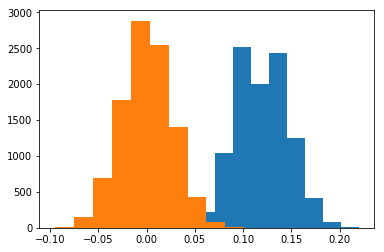

In [20]:
df_new = df2.query('landing_page == "new_page"')
sample_df_new = df_new.sample(150)

means = [] 
for _ in range(10000): 
    bootsample = df_new.sample(150, replace = True)
    means.append(bootsample.converted.mean())

np.std(means)
null_vals = np.random.normal(0,np.std(means),10000)
plt.hist(means)
plt.hist(null_vals);
#(means-null_vals).mean()
df_new.converted.mean()

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

0.1203863045004612

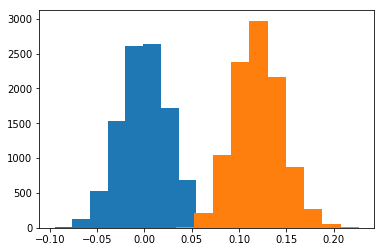

In [90]:
df_old = df2.query('landing_page == "old_page"')
sample_df_new = df_new.sample(150)

means = [] 
for _ in range(10000): 
    bootsample = df_new.sample(150, replace = True)
    means.append(bootsample.converted.mean())

np.std(means)
null_vals = np.random.normal(0,np.std(means),10000)
plt.hist(null_vals);
plt.hist(means);
df_old.converted.mean()

c. What is $n_{new}$?

In [43]:
n_new = df2.query('landing_page == "new_page"')

d. What is $n_{old}$?

In [44]:
n_old = df2.query('landing_page == "old_page"')

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

0.11880806551510564

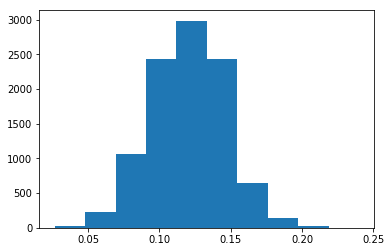

In [91]:
new_page_converted = df2.query('landing_page == "new_page"')
sample_df_new = new_page_converted.sample(150)

means = [] 
for _ in range(10000): 
    bootsample = new_page_converted.sample(150, replace = True)
    means.append(bootsample.converted.mean())

np.std(means)
#null_vals = np.random.normal(0,np.std(means),10000)
#plt.hist(null_vals);
plt.hist(means)
new_page_converted.converted.mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

0.1203863045004612

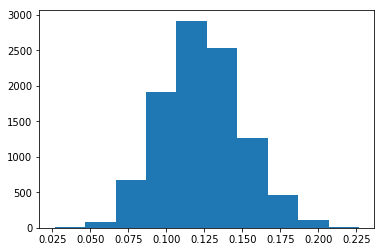

In [92]:
n_old = df2.query('landing_page == "old_page"')
old_page_converted = n_old

sample_df_new = old_page_converted.sample(150)

means = [] 
for _ in range(10000): 
    bootsample = old_page_converted.sample(150, replace = True)
    means.append(bootsample.converted.mean())

np.std(means)
#null_vals = np.random.normal(0,np.std(means),10000)
plt.hist(means);
old_page_converted.converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [94]:
diff = old_page_converted.converted.mean() - new_page_converted.converted.mean()
diff

0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [95]:
### import numpy as np 
np.random.seed(42)
p_diffs = [] 
for _ in range(10000): 
    bootsample = df2.sample(150, replace = True)
    p_new = bootsample[bootsample['landing_page']=='new_page']['converted'].mean()
    p_old = bootsample[bootsample['landing_page']=='old_page']['converted'].mean()
    p_diffs.append(p_new - p_old)

p_diffs    
#np.percentile(p_diffs,2.5), np.percentile(p_diffs,97.5)

[-0.009957325746799417,
 0.003956122999460535,
 -0.09642857142857143,
 0.015647226173541973,
 0.03098290598290597,
 -0.06280193236714976,
 0.005159224337306534,
 0.022759601706970112,
 -0.04616210413311864,
 -0.06314024958092754,
 0.01671511627906977,
 0.04302987197724041,
 -0.02991452991452992,
 0.07139023081052065,
 -0.0028694404591104727,
 -0.019391567336772803,
 0.020281088774239453,
 -0.04072398190045248,
 -0.046394533357309836,
 0.0886752136752137,
 0.03530041005526831,
 0.05223747548582636,
 -0.1,
 0.10256410256410256,
 -0.030227596017069716,
 0.0440150295222759,
 -0.06428571428571428,
 -0.10648148148148148,
 -0.03311965811965813,
 -0.04369717676676857,
 0.026785714285714288,
 0.045940170940170943,
 0.04963529621063867,
 0.07577108218933856,
 -0.019420967451897142,
 0.07139023081052065,
 0.0026838432635534204,
 0.05610859728506788,
 0.016071428571428556,
 0.05916202121920518,
 -0.09001956947162426,
 -0.046255114748265436,
 0.04892367906066536,
 -0.11785714285714285,
 -0.04285714

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [49]:
import numpy as np 
import pandas as pd
np.random.seed(42)
p_diffs = [] 
for _ in range(10000): 
    bootsample = df2.sample(150, replace = True)
    p_new = bootsample[bootsample['landing_page']=='new_page']['converted'].mean()
    p_old = bootsample[bootsample['landing_page']=='old_page']['converted'].mean()
    p_diffs.append(p_new - p_old)

p_diffs 


import numpy as np 
actual_old = df_old.converted.mean()
actual_old
actual_new = df_new.converted.mean()
actual_new
actual_diff = actual_new - actual_old
actual_diff
 
a = pd.DataFrame({'col':p_diffs})
a
diff_check = a - actual_diff
diff_check

df_final = diff_check[diff_check['col'] > 0.0]
df_final

df_check = df_final.count()
proportions = (df_check/10000)*100
proportions

#def func(diff_check):
#    boolean=0
#    for k in diff_check:
#        if k > 0.0:
#            boolean = 1
#        else:
#            boolean

#func(diff_check)
#x = sum(boolean)
#print(x)

col    49.77
dtype: float64

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It shows the error associated with our simulation. 49.97% of the 10000 simulations gave us the difference in means is slightly greater than difference in means in the actuals. Since this is nearly 50%, This is tending towards NULL hypothesis being true. We will need to check if this difference is actually statistically significant in the next question**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [57]:
import statsmodels.api as sm
n_new = df2.query('landing_page == "new_page"')
total_new = n_new.count()
print(total_new)
convert_new = n_new['converted'].sum()
print(convert_new)
n_old = df2.query('landing_page == "old_page"')
convert_old = n_old['converted'].sum()
print(n_old)
print(convert_old)

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64
17264
        user_id timestamp    group landing_page  converted
0        851104   11:48.6  control     old_page          0
1        804228   01:45.2  control     old_page          0
4        864975   52:26.2  control     old_page          1
5        936923   20:49.1  control     old_page          0
7        719014   48:29.5  control     old_page          0
15       644214   05:21.7  control     old_page          1
16       847721   01:00.1  control     old_page          0
18       650559   55:51.1  control     old_page          0
19       935734   33:37.4  control     old_page          0
25       746742   38:29.6  control     old_page          0
28       913579   11:39.2  control     old_page          1
30       690284   22:57.2  control     old_page          0
34       710349   24:44.2  control     old_page          0
35       677533   48:50.5  control     o

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
import statsmodels.api as sm

#import numpy as np
#from statsmodels.stats.proportion import proportions_ztest
#count = np.array([17489, 145310])
#nobs = np.array([83, 99])
#stat, pval = proportions_ztest(counts, nobs)
#print('{0:0.3f}'.format(pval))

z_score, p_value = sm.stats.proportions_ztest([17489, 17264],[145274, 145310])

print(z_score) 
print(p_value)
#p_value

from scipy.stats import norm

#norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

#norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.3109241984234394
0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**As we see the p value is > 0.05 and the z score is 1.31 which is within the critical value we cannot reject the null hypothesis. The difference between the mean conversions between old and new page is not statistically significant**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [22]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm;

df2['intercept']=1
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2['ab_page'] = df2['group'].apply(lambda x: '1' if x == 'treatment' else '0')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page
2,661590,55:06.2,treatment,new_page,0,1,0,1,1
3,853541,28:03.1,treatment,new_page,0,1,0,1,1
6,679687,26:46.9,treatment,new_page,1,1,0,1,1
8,817355,58:09.0,treatment,new_page,1,1,0,1,1
9,839785,11:06.6,treatment,new_page,1,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm;


df2['intercept']=1
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2['ab_page'] = df2['group'].apply(lambda x: 1 if x == 'treatment' else 0)
df2.head()

#df2 = df2.drop('old_page',1)

df2['intercept']=1
logit_mod = sm.Logit(df2['converted'] , df2[['intercept','ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:50:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:51:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**0.19 is the p-value. It is very similar to p-value obtained in part II which was 0.189. Alternate hypothesis is that ab_page column is having an effect on the convertion, but similar to part II results it proves we should go with null hypothesis i.e. no impact**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other variables like average time spent on the page, number of clicks made on the page can help explain the difference between convertion better. No I don't think adding these 2 variables will have any disadvantage to the regression model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [72]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

#df_new['intercept']=1
#df_new = df_new.drop('US',1)

#logit_mod = sm.Logit(df_new['converted'] , df_new[['intercept','ab_page','CA','UK']])
#results = logit_mod.fit()
#results.summary()


,country,timestamp,group,landing_page,converted,intercept,new_page,ab_page,CA,UK,ab_page_UK,ab_page_CA,ab_page_US,US
user_id,,,,,,,,,,,,,,
834778,UK,08:43.3,control,old_page,0,1,0,0,0,1,0,0,0,0
928468,US,44:16.4,treatment,new_page,0,1,1,1,0,0,0,0,1,1
822059,UK,04:14.7,treatment,new_page,1,1,1,1,0,1,1,0,0,0
711597,UK,14:24.8,control,old_page,0,1,0,0,0,1,0,0,0,0
710616,UK,14:44.0,treatment,new_page,0,1,1,1,0,1,1,0,0,0


Yes, The user being in the USA will have a statistically significant impact on convertion rate as it has a lower than
0.05 value all others ab_page, UK and Canada have high p-values indicating they do not have an impact

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [74]:
df_new['ab_page_US'] = df_new['ab_page']*df_new['US']
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA']
df_new.head()


df_new['intercept']=1
logit_mod = sm.Logit(df_new['converted'] , df_new[['intercept','ab_page','ab_page_UK','ab_page_CA']])
results = logit_mod.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:               3.351e-05
Time:                        23:51:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
ab_page_UK     0.0257      0.019      1.363      0.173      -0.011       0.063
ab_page_CA    -0.0644      0.038     -1.679      0.093      -0.140       0.011
==============================================================================
"""

Yes, The user being in the USA will have a statistically significant difference in convertion rate in old and new 
pages as it has a lower than 0.05 value all others ab_page_UK and ab_page_Canada have high p-values 
indicating they do not have an impact
This ab_page_US variable is same as US variable so results are same


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.